In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
train.head()



#reading three csv files
movie_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')


train_df = train_data
test_data.rename(columns = {'isTopCritic':'isFrequentReviewer'}, inplace = True)

test_df = test_data

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import seaborn as sns





from imblearn.over_sampling import SMOTE

from scipy.sparse import csr_matrix, hstack
from sklearn.tree import DecisionTreeClassifier

**Count of Null Values column-wise in Movie Data**

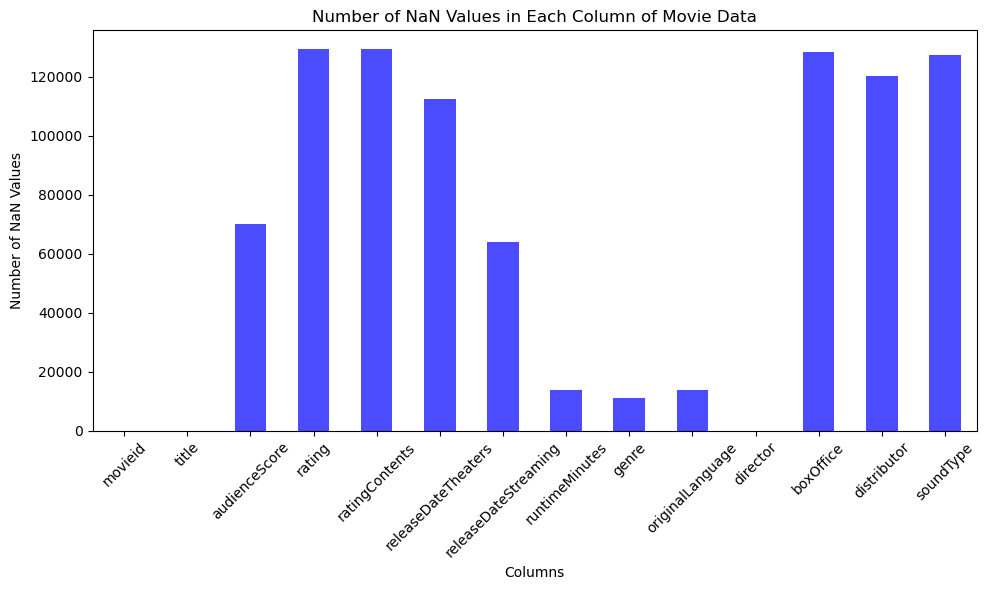

In [3]:
# Count the number of NaN values in each column
nan_counts = movie_data.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Number of NaN Values in Each Column of Movie Data')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Duplicate Rows in Movie Data**

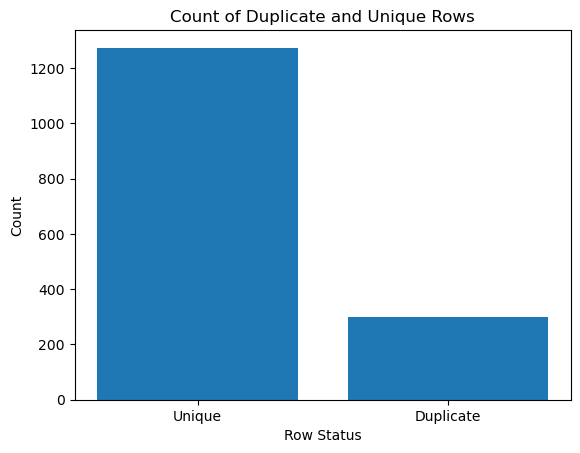

In [4]:
# Find duplicate rows
duplicate_rows = movie_data[movie_data.duplicated()]

# Calculate the count of each duplicate row
duplicate_counts = duplicate_rows.duplicated().value_counts()

# Create a bar plot
plt.bar(['Unique', 'Duplicate'], duplicate_counts)

# Adding labels and title
plt.xlabel('Row Status')
plt.ylabel('Count')
plt.title('Count of Duplicate and Unique Rows')

# Show the plot
plt.show()

**Count of Null Values column-wise in Train Data**

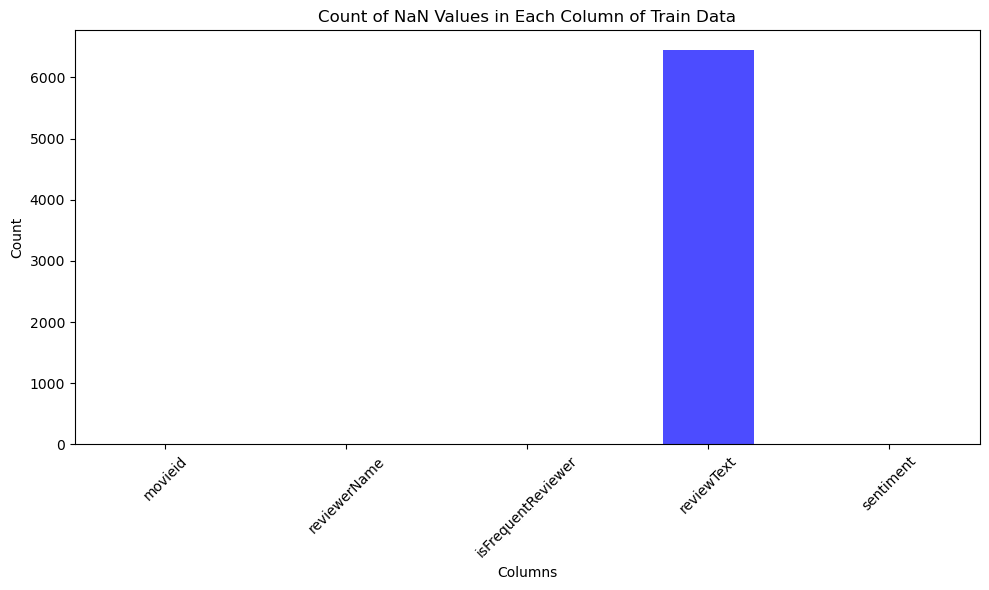

In [5]:
# Count the number of NaN values in each column
nan_counts = train_df.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Count of NaN Values in Each Column of Train Data')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Count of Each Sentiment in Train Data**

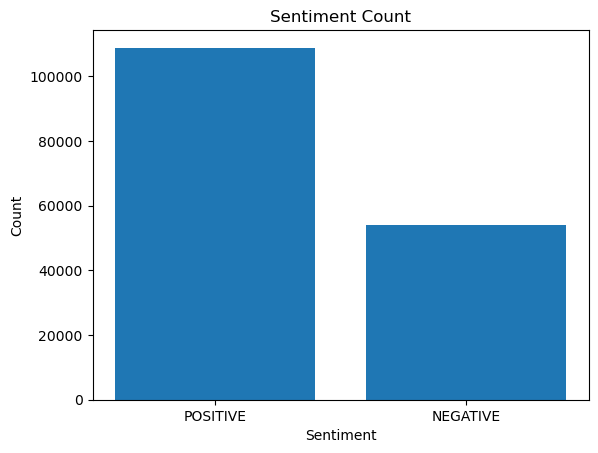

In [6]:
# Count of Each Sentiment in sentiment column
sentiment_count = train_df['sentiment'].value_counts()

# Create a bar plot
plt.bar(sentiment_count.index, sentiment_count.values)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count')

# Show the plot
plt.show()

**Count of Null Values column-wise in Test Data**

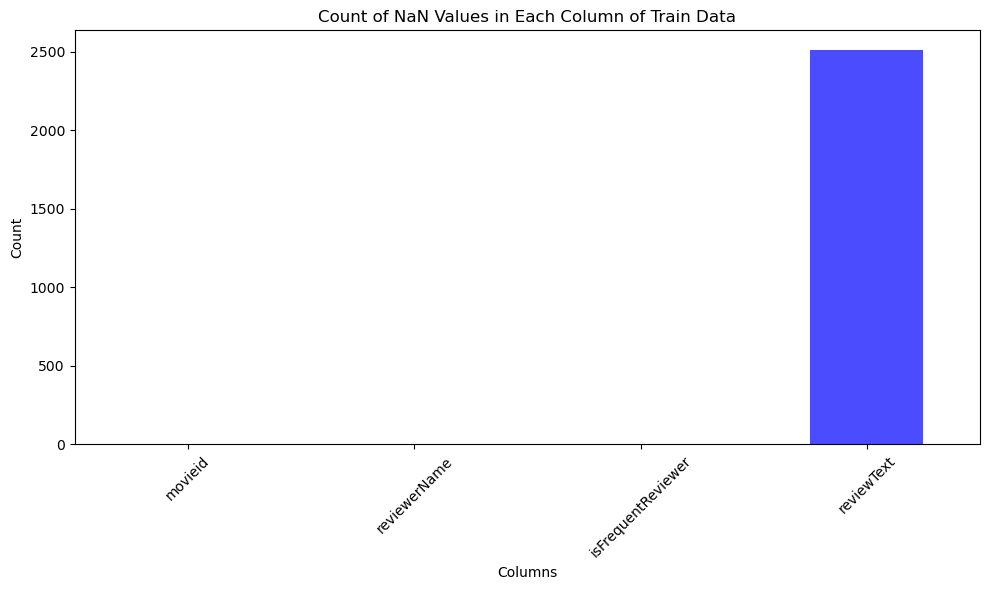

In [7]:
# Count the number of NaN values in each column
nan_counts = test_df.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Count of NaN Values in Each Column of Train Data')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
#Replacing np.nan with empty string in both training and test data 

train_df['reviewText'] = train_df['reviewText'].replace(np.nan, '')
test_df['reviewText'] = test_df['reviewText'].replace(np.nan, '')

test_df#['ratingContents'].unique()

,movieid,reviewerName,isFrequentReviewer,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...
...,...,...,...,...
55310,celestial_radiant,Jose Mccormick,False,Ron Howard delivers an unconventional romantic...
55311,vivid_james_t._kirk,Thomas Osborne,False,As an oddball art film that openly invites you...
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,Julie Kirby,False,Nicholson wears his devilish grin from his fir...
55313,terminator_epic_rocky_balboa_mystic,Tina Sutton,True,It's hard not be entertained by two dozen of C...


# Data Pre Processing


In [9]:
movie_data = movie_data.drop_duplicates(subset='movieid', keep='first')

duplicate = movie_data[movie_data['movieid'].duplicated()]
print(pd.DataFrame(duplicate).shape)

(0, 14)


In [10]:
import re
def convert_currency(df):
    # Define the regex pattern to match the currency format
    pattern = r'\$(\d+(\.\d+)?)([kKmMbBtT])?'

    def replace(match):
        value = float(match.group(1))  # Extract the numerical value
        suffix = match.group(3)  # Extract the suffix (k, M, B, T)

        if suffix:
            suffix = suffix.lower()
            if suffix == 'k':
                value *= 1000
            elif suffix == 'm':
                value *= 1000000
            elif suffix == 'b':
                value *= 1000000000
            elif suffix == 't':
                value *= 1000000000000

        return str(int(value))

    # Apply the regex substitution to each element in the DataFrame
    df = df.apply(lambda x: re.sub(pattern, replace, x) if (isinstance(x, str) and not pd.isnull(x)) else x)
    
    return df

In [11]:
boxoffice = convert_currency(movie_data['boxOffice'])
boxOffice = pd.DataFrame(boxoffice, columns=['boxOffice'])

movie_data = movie_data.copy()
movie_data['boxOffice'] = boxOffice['boxOffice']

Converting boxoffice data into numeric data

In [12]:
print(movie_data.dtypes)
object_movie_data_cols = movie_data.select_dtypes(include='object').columns
float64_movie_data_cols = movie_data.select_dtypes(include='float64').columns
print('object_movie_data_cols',object_movie_data_cols)
print('float64_movie_data_cols',float64_movie_data_cols)
movie_data.columns

movieid                  object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
dtype: object
object_movie_data_cols Index(['movieid', 'title', 'rating', 'ratingContents', 'releaseDateTheaters',
       'releaseDateStreaming', 'genre', 'originalLanguage', 'director',
       'boxOffice', 'distributor', 'soundType'],
      dtype='object')
float64_movie_data_cols Index(['audienceScore', 'runtimeMinutes'], dtype='object')


Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

Data Loading and intial cleaning

In [13]:
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [14]:
# Custom lambda function to split genre and handle NaN values
def split_genre(x):
    if pd.notna(x):
        return x.split(', ')
    else:
        return []

# Apply the custom lambda function to the 'genre' column
movie_data['genre'] = movie_data['genre'].apply(split_genre)

mlb = MultiLabelBinarizer()

# Transform the 'genre' column into one-hot encoded columns
one_hot_encoded_genres = mlb.fit_transform(movie_data['genre'])

# Create a new DataFrame with the one-hot encoded columns
movie_data[mlb.classes_] = pd.DataFrame(one_hot_encoded_genres, columns=mlb.classes_)



def for converting genre coluumn data into list and encoding it with  Multilabel Binarizer

In [15]:
movie_data=movie_data.drop(['genre'],axis =1)

In [16]:
director_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler',MinMaxScaler())
])

# Combine the preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('dir', director_preprocessor, ['director','distributor'])
])

# Fit and transform the data using the ColumnTransformer
dir_preprocessed_data = preprocessor.fit_transform(movie_data)

# Convert the preprocessed data into a DataFrame
dir_preprocessed_df = pd.DataFrame(dir_preprocessed_data, columns=['director','distributor'])


# # # Replace the original columns with the preprocessed columns in the original DataFrame 'df'
movie_data[['director','distributor']] = dir_preprocessed_df
    

In [17]:
movie_data=movie_data.drop(['title','rating','ratingContents','releaseDateTheaters','releaseDateStreaming'],axis=1)

In [18]:
movie_data

,movieid,audienceScore,runtimeMinutes,originalLanguage,director,boxOffice,distributor,soundType,Action,Adventure,...,Romance,Sci-fi,Short,Special interest,Sports,Sports & fitness,Stand-up,Variety,War,Western
0,han_solo_heroic_myth_wonder_woman,50.0,75.0,English,0.169130,NaN,0.64946,NaN,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,voyage_tyler_durden_han_solo_stardust,NaN,114.0,English,0.720839,NaN,0.64946,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,norman_bates_ferris_bueller_hermione_granger_v...,43.0,120.0,Korean,0.925830,NaN,0.64946,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,elegant_hermione_granger,60.0,90.0,English,0.243076,NaN,0.64946,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,adventure_rocky_balboa,70.0,80.0,English,0.383078,NaN,0.64946,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,NaN,131.0,Hindi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,14.0,90.0,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143254,mr._miyagi_katniss_everdeen_harmony,NaN,99.0,English,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,71.0,43.0,English,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
X = (pd.merge(train_df, movie_data, on='movieid',how='inner')).drop(['reviewerName','sentiment','movieid'],axis=1)
Z = (pd.merge(test_df, movie_data, on='movieid',how='inner')).drop(['reviewerName','movieid'],axis=1)
print(train_df.shape, X.shape)

print(test_df.shape, Z.shape)


(162758, 5) (162758, 46)
(55315, 4) (55315, 46)


Dropping reviewwer name, sentiment and movieid column

In [20]:
X.dtypes

isFrequentReviewer         bool
reviewText               object
audienceScore           float64
runtimeMinutes          float64
originalLanguage         object
director                float64
boxOffice                object
distributor             float64
soundType                object
Action                  float64
Adventure               float64
Animation               float64
Anime                   float64
Biography               float64
Comedy                  float64
Crime                   float64
Documentary             float64
Drama                   float64
Entertainment           float64
Faith & spirituality    float64
Fantasy                 float64
Foreign                 float64
Gay & lesbian           float64
Health & wellness       float64
History                 float64
Holiday                 float64
Horror                  float64
Kids & family           float64
Lgbtq+                  float64
Music                   float64
Musical                 float64
Mystery 

In [21]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Anime', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Entertainment',
       'Faith & spirituality', 'Fantasy', 'Foreign', 'Gay & lesbian',
       'Health & wellness', 'History', 'Holiday', 'Horror',
       'Kids & family', 'Lgbtq+', 'Music', 'Musical',
       'Mystery & thriller', 'Nature', 'News', 'Other', 'Reality',
       'Romance', 'Sci-fi', 'Short', 'Special interest', 'Sports',
       'Sports & fitness', 'Stand-up', 'Variety', 'War', 'Western'],
      dtype=object)

In [22]:

# Categorical columns
categorical_cols = ['isFrequentReviewer', 'originalLanguage', 'soundType','Action', 'Adventure', 'Animation', 'Anime', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Entertainment',
       'Faith & spirituality', 'Fantasy', 'Foreign', 'Gay & lesbian',
       'Health & wellness', 'History', 'Holiday', 'Horror',
       'Kids & family', 'Lgbtq+', 'Music', 'Musical',
       'Mystery & thriller', 'Nature', 'News', 'Other', 'Reality',
       'Romance', 'Sci-fi', 'Short', 'Special interest', 'Sports',
       'Sports & fitness', 'Stand-up', 'Variety', 'War', 'Western']

# Numerical columns
numerical_cols = ['runtimeMinutes', 'audienceScore','boxOffice']

# Preprocessing for categorical columns
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler',MinMaxScaler())
])

# Preprocessing for numerical columns
numerical_preprocessor = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())
])

# Combine the preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_preprocessor, categorical_cols),
    ('num', numerical_preprocessor, numerical_cols),
    ('movie',SimpleImputer(strategy='most_frequent'),['director','distributor'])
])

# Fit and transform the data using the ColumnTransformer
preprocessed_data = preprocessor.fit_transform(X)

# Convert the preprocessed data into a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=categorical_cols + numerical_cols+['director','distributor'])


# # # Replace the original columns with the preprocessed columns in the original DataFrame
X[categorical_cols + numerical_cols+['director','distributor']] = preprocessed_df
    
X

,isFrequentReviewer,reviewText,audienceScore,runtimeMinutes,originalLanguage,director,boxOffice,distributor,soundType,Action,...,Romance,Sci-fi,Short,Special interest,Sports,Sports & fitness,Stand-up,Variety,War,Western
0,0.0,Henry Selick’s first movie since 2009’s Corali...,0.65,0.181329,0.200000,0.045181,0.058158,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,&#91;T&#93;he haphazard way this story is asse...,0.65,0.181329,0.200000,0.045181,0.058158,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,The stop-motion artistry of Wendell &amp; Wild...,0.65,0.181329,0.200000,0.045181,0.058158,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Wendell &amp; Wild is narratively overstuffed ...,0.65,0.181329,0.200000,0.045181,0.058158,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,For being about the Netherworlds&#44; it&#8217...,0.65,0.181329,0.200000,0.045181,0.058158,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,0.0,The broad shape of the ending is predictable; ...,0.81,0.192101,0.244444,0.830026,0.058158,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162754,0.0,A formula designed for adolescent and young ad...,0.75,0.159785,0.488889,0.246658,0.000130,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162755,0.0,"All these years, I've kept a soft spot in my h...",0.55,0.165171,0.200000,0.318365,0.000931,0.64946,0.18578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
162756,0.0,Powerful documentary about the struggle of Wes...,0.75,0.152603,0.200000,0.858998,0.058158,0.64946,0.18578,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Fit and transform the data using the ColumnTransformer
Z_preprocessed_data = preprocessor.transform(Z)

# Convert the preprocessed data into a DataFrame
Z_preprocessed_df = pd.DataFrame(Z_preprocessed_data, columns=categorical_cols + numerical_cols+['director','distributor'])


# # # Replace the original columns with the preprocessed columns in the original DataFrame
Z[categorical_cols + numerical_cols+['director','distributor']] = Z_preprocessed_df

Encoding Target Columns

In [24]:
Y = train_df['sentiment']
# Encoding True/False data with 0/1 using LabelEncoder
model_LE = LabelEncoder()
Y = model_LE.fit_transform(Y)

Vectorizing and Scaling reviewText Column

In [25]:
pipe1 = Pipeline([('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler())])

X_review = pipe1.fit_transform(train_df['reviewText']) #training
Z_review = pipe1.transform(test_df['reviewText'])   #test


X.drop(columns=['reviewText','runtimeMinutes','originalLanguage','director','distributor','soundType'], inplace=True) #training
Z.drop(columns=['reviewText','runtimeMinutes','originalLanguage','director','distributor','soundType'], inplace=True)   #test
X

,isFrequentReviewer,audienceScore,boxOffice,Action,Adventure,Animation,Anime,Biography,Comedy,Crime,...,Romance,Sci-fi,Short,Special interest,Sports,Sports & fitness,Stand-up,Variety,War,Western
0,0.0,0.65,0.058158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.65,0.058158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.65,0.058158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.65,0.058158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.65,0.058158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,0.0,0.81,0.058158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162754,0.0,0.75,0.000130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162755,0.0,0.55,0.000931,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
162756,0.0,0.75,0.058158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating Final Sparse Matrix 

In [26]:
X_sparse = hstack([csr_matrix(X.values), X_review])
Z_sparse = hstack([csr_matrix(Z.values), Z_review])

X_train , X_test, y_train,y_test =train_test_split(X_sparse,Y,test_size=0.3,shuffle=True,random_state=42)

In [27]:
xt =X_train.toarray()


In [28]:
xt[:, 1:3]

array([[5.30000000e-01, 5.81576528e-02],
       [9.30000000e-01, 1.70899348e-01],
       [6.52145408e-01, 5.81576528e-02],
       ...,
       [3.90000000e-01, 1.47949674e-02],
       [7.30000000e-01, 5.92963653e-05],
       [4.40000000e-01, 7.81686848e-02]])

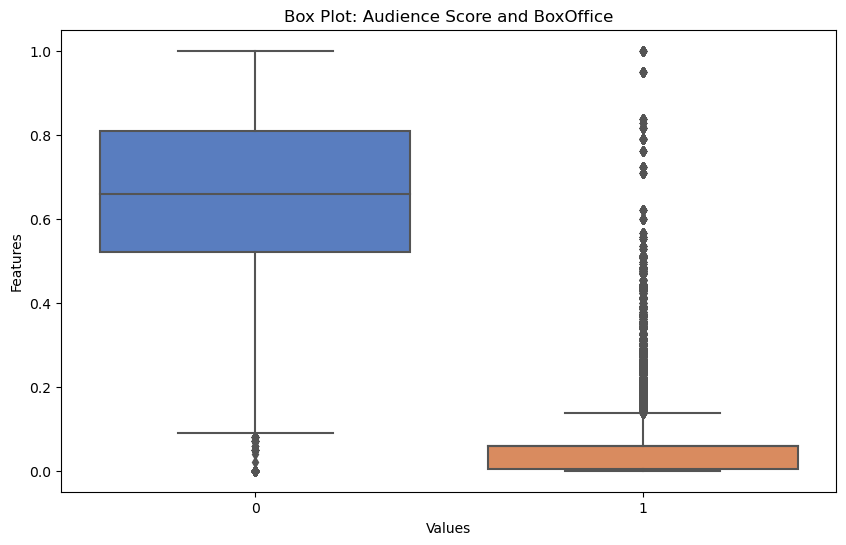

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[xt[:,1],xt[:,2]], palette='muted')
plt.title("Box Plot: Audience Score and BoxOffice")
plt.ylabel("Features")
plt.xlabel("Values")
plt.show()

# Baseline Model


In [30]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train,y_train)

print('Train Score:',dummy_clf.score(X_train, y_train))
print('Test Score:',dummy_clf.score(X_test, y_test))

Train Score: 0.6682524357061354
Test Score: 0.6682026705988368


# Logistic Regression Model

**Model Training**

In [31]:
#model training

# Applying Logistic Regression with Cross-Validation
model_lr_cv = LogisticRegressionCV(
    Cs=[0.001, 0.01, 0.1,1],
    penalty='l2',
    solver='lbfgs',
    max_iter=500,
    cv=5,
    scoring='f1'
)
best_lr_cv = model_lr_cv.fit(X_train,y_train)

**Prediction**

In [32]:
#train prediction and score
y_train_pred_prob = best_lr_cv.predict_proba(X_train)[:, 1]  # Predicted probabilities for train data
threshold = 0.5
y_train_pred_lr_cv = (y_train_pred_prob >= threshold).astype(int)
lr_cv_train_accuracy_score = accuracy_score(y_train,y_train_pred_lr_cv)   #Train accuracy 

#test prediction and score
y_test_pred_prob = best_lr_cv.predict_proba(X_test)[:, 1]  # Predicted probabilities for test data
threshold = 0.5
y_test_pred_lr_cv = (y_test_pred_prob >= threshold).astype(int)
lr_cv_test_accuracy_score = accuracy_score(y_test,y_test_pred_lr_cv)   #Test accuracy 




print('Test Score:',lr_cv_test_accuracy_score)
print('Train Score:',lr_cv_train_accuracy_score)

#

z_pred_prob = best_lr_cv.predict_proba(Z_sparse)[:, 1]  # Predicted probabilities for test_df data
z_pred = (z_pred_prob >= threshold).astype(int)
z_pred_lr_cv = model_LE.inverse_transform(z_pred)  #Reversing the 0/1 to Negative/Positive values





Test Score: 0.7947489145572213
Train Score: 0.8772579654173616


**Classification Report**

In [33]:
#classification report
classification_report_result_lr_cv = classification_report(y_test, y_test_pred_lr_cv)
print(classification_report_result_lr_cv)

              precision    recall  f1-score   support

           0       0.74      0.58      0.65     16201
           1       0.81      0.90      0.85     32627

    accuracy                           0.79     48828
   macro avg       0.78      0.74      0.75     48828
weighted avg       0.79      0.79      0.79     48828



**Confusion Matrix**

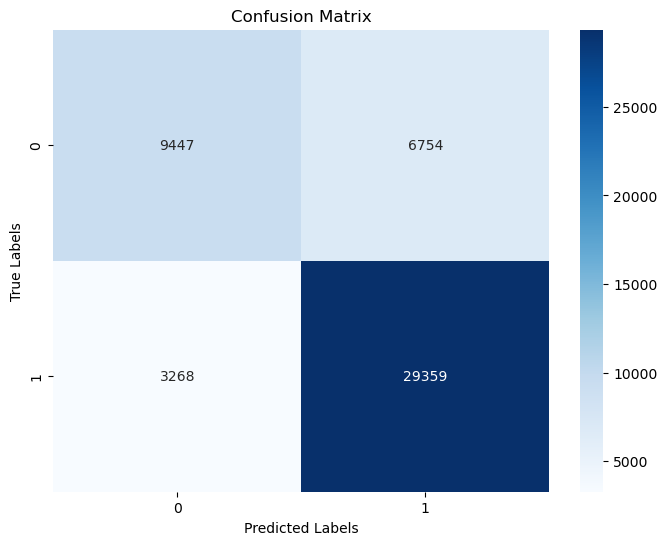

In [34]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred_lr_cv)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# submission = pd.DataFrame(columns = ['id', 'sentiment'])
# submission['id'] = [i for i in range(len(z_pred_lr_cv))]
# submission['sentiment'] = z_pred_lr_cv
# submission.to_csv('submission.csv',index = False)

# SVM Model



**Model Training**

In [36]:
#model training

classifier = LinearSVC(random_state=42)

param_grid = {'C': [0.01,0.1,0.001], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [500,1000,1500]}

# Applying Grid Search

svc_gs_cv = GridSearchCV(classifier, param_grid = param_grid, refit = True, verbose=2)
best_svc_gs_cv = svc_gs_cv.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...................C=0.01, loss=hinge, max_iter=500; total time=   0.4s
[CV] END ...................C=0.01, loss=hinge, max_iter=500; total time=   0.4s
[CV] END ...................C=0.01, loss=hinge, max_iter=500; total time=   0.4s
[CV] END ...................C=0.01, loss=hinge, max_iter=500; total time=   0.4s
[CV] END ...................C=0.01, loss=hinge, max_iter=500; total time=   0.4s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.4s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.5s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.4s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.5s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.5s
[CV] END ..................C=0.01, loss=hinge, max_iter=1500; total time=   0.4s
[CV] END ..................C=0.01, loss=hinge, m

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=0.1, loss=hinge, max_iter=500; total time=   1.8s
[CV] END ....................C=0.1, loss=hinge, max_iter=500; total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=0.1, loss=hinge, max_iter=500; total time=   1.6s
[CV] END ....................C=0.1, loss=hinge, max_iter=500; total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=0.1, loss=hinge, max_iter=500; total time=   1.6s
[CV] END ...................C=0.1, loss=hinge, max_iter=1000; total time=   1.9s
[CV] END ...................C=0.1, loss=hinge, max_iter=1000; total time=   1.1s
[CV] END ...................C=0.1, loss=hinge, max_iter=1000; total time=   2.6s
[CV] END ...................C=0.1, loss=hinge, max_iter=1000; total time=   1.1s
[CV] END ...................C=0.1, loss=hinge, max_iter=1000; total time=   1.6s
[CV] END ...................C=0.1, loss=hinge, max_iter=1500; total time=   1.6s
[CV] END ...................C=0.1, loss=hinge, max_iter=1500; total time=   1.0s
[CV] END ...................C=0.1, loss=hinge, max_iter=1500; total time=   2.6s
[CV] END ...................C=0.1, loss=hinge, max_iter=1500; total time=   1.3s
[CV] END ...................C=0.1, loss=hinge, max_iter=1500; total time=   1.8s
[CV] END ............C=0.1, loss=squared_hinge, max_iter=500; total time=   1.2s
[CV] END ............C=0.1, 

**Prediction**

In [37]:
#train prediction and score

y_train_pred_svc = best_svc_gs_cv.predict(X_train)
y_train_pred_svc_accuracy_score = accuracy_score(y_train,y_train_pred_svc)

#train prediction and score

y_test_pred_svc = best_svc_gs_cv.predict(X_test) 
y_test_pred_svc_accuracy_score = accuracy_score(y_test,y_test_pred_svc)

print('Test Score:',y_test_pred_svc_accuracy_score)
print('Train Score:',y_train_pred_svc_accuracy_score)

Test Score: 0.7948922749242238
Train Score: 0.8789783200210656


**Classification Report**

In [38]:
#classification report

classification_report_result_svc = classification_report(y_test, y_test_pred_svc)
print(classification_report_result_svc)

              precision    recall  f1-score   support

           0       0.74      0.58      0.65     16201
           1       0.81      0.90      0.85     32627

    accuracy                           0.79     48828
   macro avg       0.78      0.74      0.75     48828
weighted avg       0.79      0.79      0.79     48828



**Confusion Matrix**

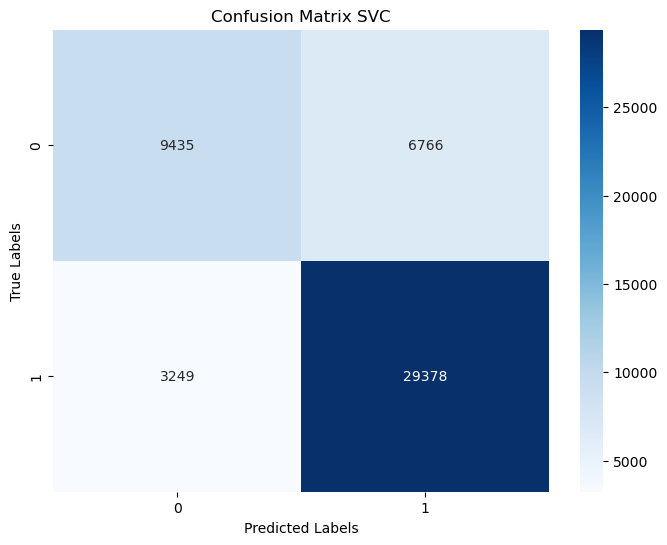

In [39]:

#confusion matrix
cm_svc = confusion_matrix(y_test, y_test_pred_svc)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix SVC')
plt.show()

# KNN

**Model Training**

In [40]:

parameters = {
    'svd__n_components': [120], 
    'knn__n_neighbors': [3,5,10], 
    'knn__metric' : ['euclidean'],
    'knn__n_jobs': [-1] 
}
# 
pipeline_KNN = Pipeline([('svd', TruncatedSVD(random_state=42)),('knn', KNeighborsClassifier())])


gs_knn = GridSearchCV(pipeline_KNN, param_grid = parameters, refit = True, verbose=2)
gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=3, svd__n_components=120; total time=  24.9s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=3, svd__n_components=120; total time=  24.5s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=3, svd__n_components=120; total time=  24.2s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=3, svd__n_components=120; total time=  24.4s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=3, svd__n_components=120; total time=  25.1s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=5, svd__n_components=120; total time=  27.0s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=5, svd__n_components=120; total time=  27.7s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neighbors=5, svd__n_components=120; total time=  27.8s
[CV] END knn__metric=euclidean, knn__n_jobs=-1, knn__n_neigh

GridSearchCV(estimator=Pipeline(steps=[('svd', TruncatedSVD(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean'], 'knn__n_jobs': [-1],
                         'knn__n_neighbors': [3, 5, 10],
                         'svd__n_components': [120]},
             verbose=2)

**Prediction**

In [41]:
# Make predictions and accuracy score on the test data
y_test_pred_knn = gs_knn.predict(X_test)
y_test_pred_knn_accuracy = accuracy_score(y_test, y_test_pred_knn)


# Make predictions and accuracy score on the train data
y_train_pred_knn = gs_knn.predict(X_train)
y_train_pred_knn_accuracy = accuracy_score(y_train, y_train_pred_knn)


print('Test Score:',y_test_pred_knn_accuracy)
print('Train Score:',y_train_pred_knn_accuracy)

Test Score: 0.6172483001556484
Train Score: 0.7423154568594751


**Classification Report**

In [42]:
# Generate the test classification report
classification_report_result_knn = classification_report(y_test, y_test_pred_knn)

print(classification_report_result_knn)

              precision    recall  f1-score   support

           0       0.38      0.25      0.31     16201
           1       0.68      0.80      0.74     32627

    accuracy                           0.62     48828
   macro avg       0.53      0.53      0.52     48828
weighted avg       0.58      0.62      0.59     48828



**Confusion Matrix**

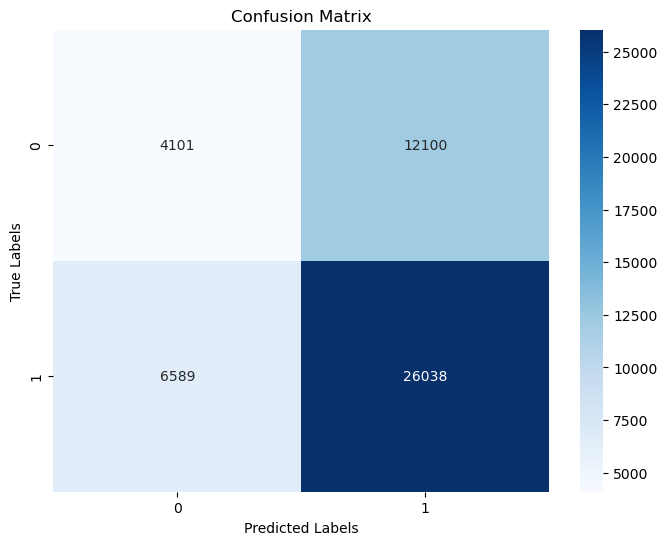

In [43]:
#confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# CART

**Model Training**

In [44]:
base_cart = DecisionTreeClassifier(max_depth=5, splitter='best', random_state=42)

#applying svd with base_cart(DecisionTreeClassifier)
base_cart_pipeline = Pipeline([('svd', TruncatedSVD(n_components=120, random_state=42)), ('base_cart', base_cart)])

# Fit the pipeline on the training data
base_cart_pipeline.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=120, random_state=42)),
                ('base_cart',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

**Prediction**

In [45]:
# Make predictions and accuracy score on the test data
y_test_pred_base_cart = base_cart_pipeline.predict(X_test)
y_test_pred_base_cart_accuracy = accuracy_score(y_test, y_test_pred_base_cart)


# Make predictions and accuracy score on the train data
y_train_pred_base_cart = base_cart_pipeline.predict(X_train)
y_train_pred_base_cart_accuracy = accuracy_score(y_train, y_train_pred_base_cart)


print('Test Score:',y_test_pred_base_cart_accuracy)
print('Train Score:',y_train_pred_base_cart_accuracy)

Test Score: 0.6688170721717047
Train Score: 0.6704292109189853


**Classification Report**

In [46]:
# Generate the test classification report
classification_report_result_base_cart = classification_report(y_test, y_test_pred_base_cart)

print(classification_report_result_base_cart)

              precision    recall  f1-score   support

           0       0.51      0.07      0.12     16201
           1       0.68      0.97      0.80     32627

    accuracy                           0.67     48828
   macro avg       0.59      0.52      0.46     48828
weighted avg       0.62      0.67      0.57     48828



**Confusion Matrix**

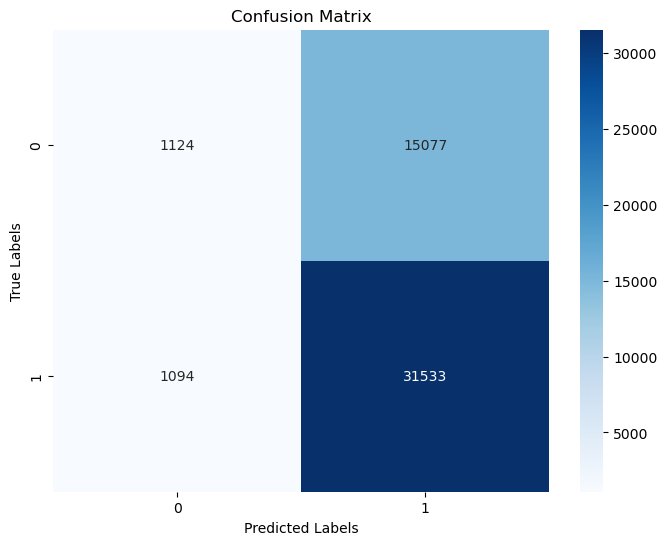

In [47]:
#confusion matrix
cm_base_cart = confusion_matrix(y_test, y_test_pred_base_cart)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_base_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Bagging Classifier on Base Cart**

**Model Training**

In [48]:
#model training
bagging_model = BaggingClassifier(base_cart, n_estimators=10, random_state=42)

# Fit the BaggingClassifier on the training data
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=42),
                  random_state=42)

**Prediction**

In [49]:
# Make predictions and accuracy score on test data 
y_test_pred_bagging = bagging_model.predict(X_test)
bagging_test_accuracy = accuracy_score(y_test, y_test_pred_bagging)

# Make predictions and accuracy score on train data 
y_train_pred_bagging = bagging_model.predict(X_train)
bagging_train_accuracy = accuracy_score(y_train, y_train_pred_bagging)


print('Test Accuracy',bagging_test_accuracy)
print('Train Accuracy',bagging_train_accuracy)

Test Accuracy 0.6783607766035881
Train Accuracy 0.6789958746598789


**Classification Report**

In [50]:
# Generate the classification report of test data
classification_report_result_bagging = classification_report(y_test, y_test_pred_bagging)

print(classification_report_result_bagging)

              precision    recall  f1-score   support

           0       0.69      0.06      0.10     16201
           1       0.68      0.99      0.80     32627

    accuracy                           0.68     48828
   macro avg       0.68      0.52      0.45     48828
weighted avg       0.68      0.68      0.57     48828



**Confusion Matrix**

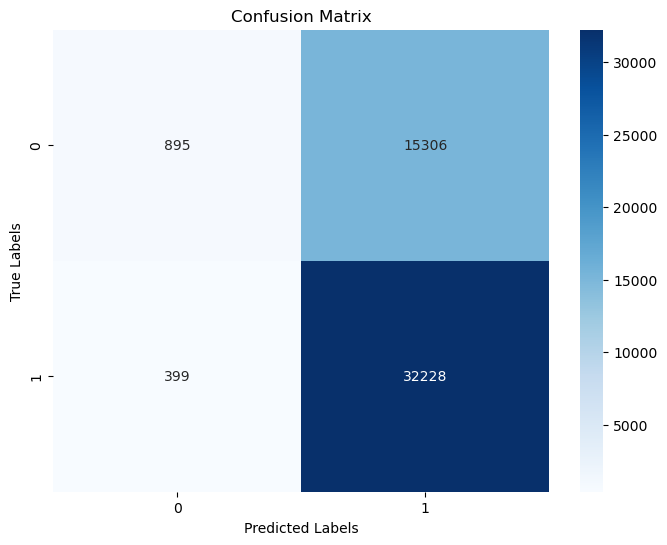

In [51]:
#confusion matrix on test data
cm_bagging = confusion_matrix(y_test, y_test_pred_bagging)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Boosting

**Model Training**

In [52]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier using the base classifier

adaboost_classifier = AdaBoostClassifier(estimator=base_cart, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   random_state=42)

**Prediction**

In [53]:
# Make predictions and accuracy score on the test data
y_test_pred_adaboost = adaboost_classifier.predict(X_test)
adaboost_test_accuracy = accuracy_score(y_test, y_test_pred_adaboost)


# Make predictions and accuracy score on the train data
y_train_pred_adaboost = adaboost_classifier.predict(X_train)
adaboost_train_accuracy = accuracy_score(y_train, y_train_pred_adaboost)


print('Test Accuracy',adaboost_test_accuracy)
print('Train Accuracy',adaboost_train_accuracy)

Test Accuracy 0.7342713197345785
Train Accuracy 0.7652505924690599


In [54]:
print(y_test_pred_adaboost)

[0 0 0 ... 0 1 1]


**Classification Report**

In [55]:
# Generate the classification report
test_classification_report_result_boosting = classification_report(y_test, y_test_pred_adaboost)

print(test_classification_report_result_boosting)

              precision    recall  f1-score   support

           0       0.65      0.42      0.51     16201
           1       0.76      0.89      0.82     32627

    accuracy                           0.73     48828
   macro avg       0.71      0.66      0.66     48828
weighted avg       0.72      0.73      0.72     48828



**Confusion Matrix**

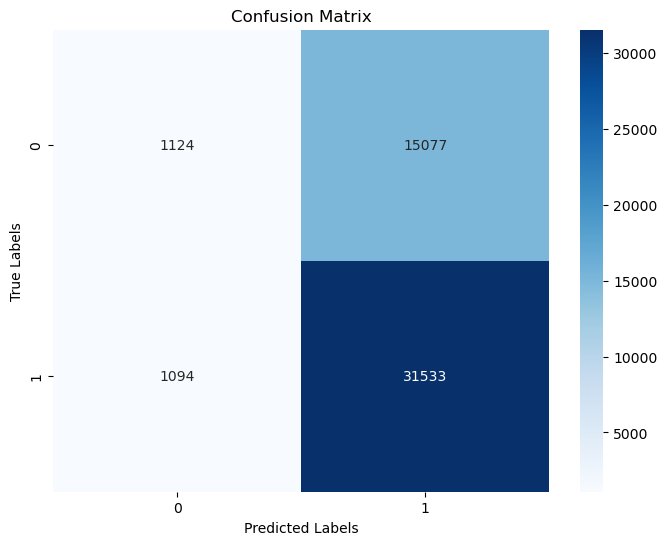

In [56]:
#confusion matrix
cm_boosting = confusion_matrix(y_test, y_test_pred_adaboost)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_base_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Z_pred_adaboost_classifier_encoded = adaboost_classifier.predict(Z_sparse)
# print(Z_pred_adaboost_classifier_encoded)

# z_pred_adaboost = model_LE.inverse_transform(Z_pred_adaboost_classifier_encoded)
# print(z_pred_adaboost)

In [58]:
# submission = pd.DataFrame(columns = ['id', 'sentiment'])
# submission['id'] = [i for i in range(len(z_pred_adaboost))]
# submission['sentiment'] = z_pred_adaboost
# submission.to_csv('submission.csv',index = False)


# **MLP**

**Model Training**

In [59]:
from sklearn.neural_network import MLPClassifier

# Create a pipeline
mlp_classifier_pipeline = Pipeline([
    ('svd', TruncatedSVD(n_components=120)),  # Adjust the number of components as needed
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,),max_iter = 500, activation='relu',early_stopping=True, solver='adam', alpha=0.01, learning_rate='constant'))
])

# Fit the pipeline on the trainin|g data
mlp_classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=120)),
                ('mlp',
                 MLPClassifier(alpha=0.01, early_stopping=True, max_iter=500))])

**Prediction**

In [60]:
# Make predictions and accuracy score on the test data
y_test_pred_mlp_classifier = mlp_classifier_pipeline.predict(X_test)
mlp_classifier_test_accuracy = accuracy_score(y_test, y_test_pred_mlp_classifier)


# Make predictions and accuracy score on the train data
y_train_pred_mlp_classifier = mlp_classifier_pipeline.predict(X_train)
mlp_classifier_train_accuracy = accuracy_score(y_train, y_train_pred_mlp_classifier)


print('Test Accuracy',mlp_classifier_test_accuracy)
print('Train Accuracy',mlp_classifier_train_accuracy)

Test Accuracy 0.6920004915212583
Train Accuracy 0.7166681295532344


**Classification Report**

In [61]:
# Generate the test classification report
test_classification_report_result_mlp_classifier = classification_report(y_test, y_test_pred_mlp_classifier)

print(test_classification_report_result_mlp_classifier)

              precision    recall  f1-score   support

           0       0.58      0.25      0.35     16201
           1       0.71      0.91      0.80     32627

    accuracy                           0.69     48828
   macro avg       0.65      0.58      0.57     48828
weighted avg       0.67      0.69      0.65     48828



**Confusion Matrix**

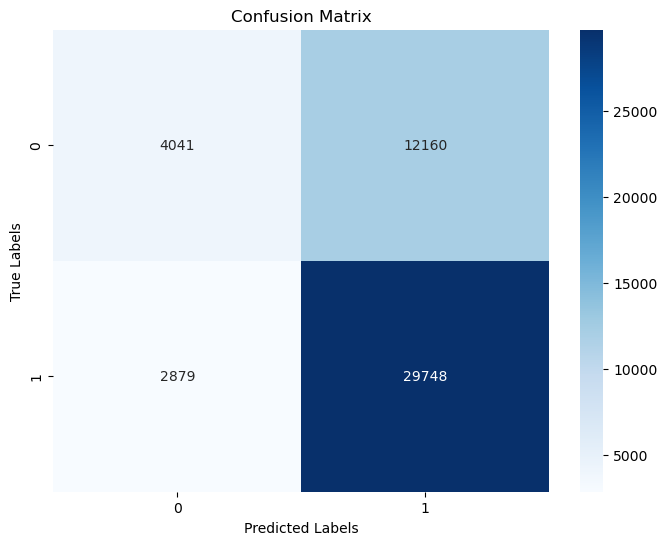

In [62]:
#confusion matrix
cm_mlp_classifier = confusion_matrix(y_test, y_test_pred_mlp_classifier)

#heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp_classifier, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Model Comparison**

**Test Acurracy Comparison**

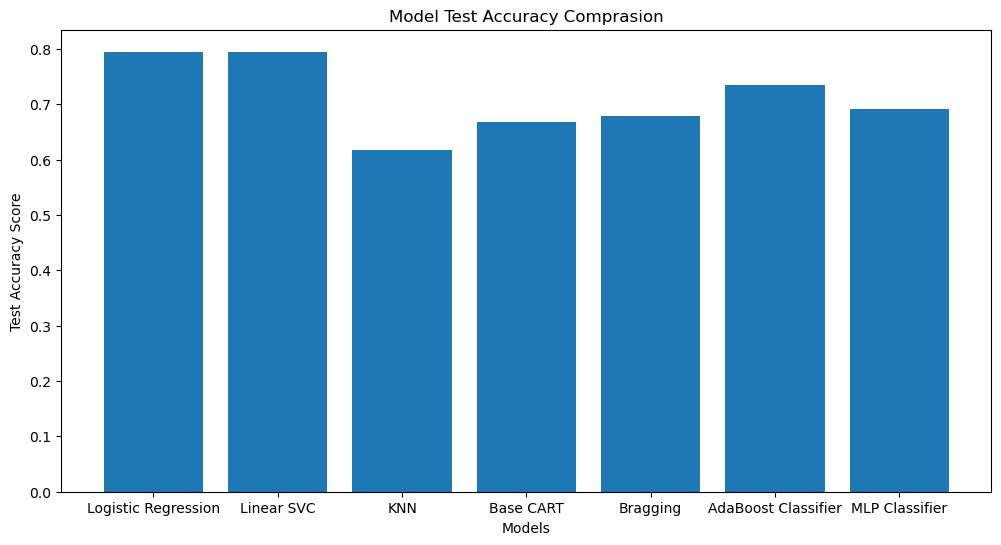

In [63]:
models = ['Logistic Regression', 'Linear SVC', 'KNN', 'Base CART','Bragging','AdaBoost Classifier','MLP Classifier']
test_accuracy_score = [lr_cv_test_accuracy_score, y_test_pred_svc_accuracy_score, y_test_pred_knn_accuracy, y_test_pred_base_cart_accuracy,bagging_test_accuracy,adaboost_test_accuracy,mlp_classifier_test_accuracy]


plt.figure(figsize=(12, 6))

plt.bar(models, test_accuracy_score)


plt.xlabel('Models')
plt.ylabel('Test Accuracy Score')
plt.title('Model Test Accuracy Comprasion')

plt.show()

**Train Accuracy Comparison**

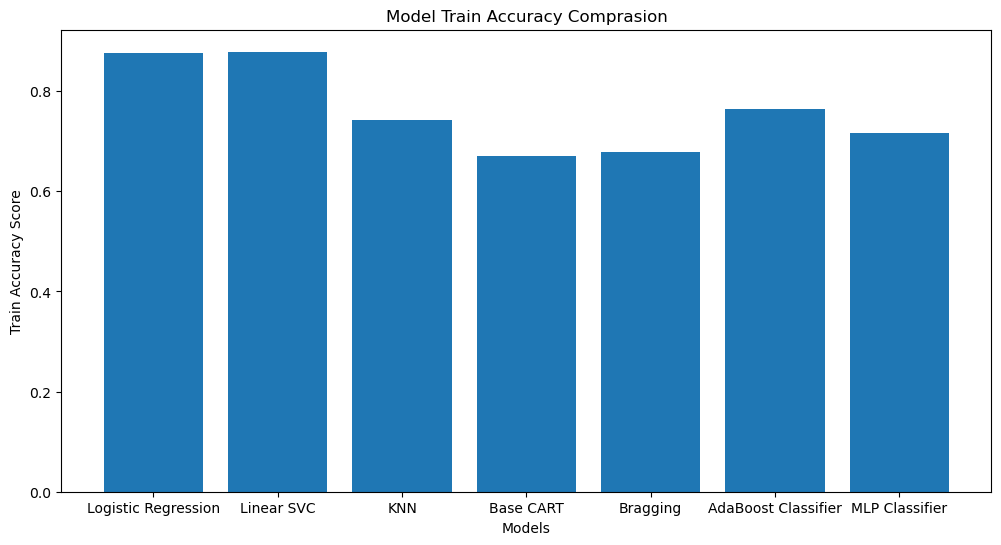

In [64]:
models = ['Logistic Regression', 'Linear SVC', 'KNN', 'Base CART','Bragging','AdaBoost Classifier','MLP Classifier']
train_accuracy_score = [lr_cv_train_accuracy_score, y_train_pred_svc_accuracy_score, y_train_pred_knn_accuracy, y_train_pred_base_cart_accuracy,bagging_train_accuracy,adaboost_train_accuracy,mlp_classifier_train_accuracy]


plt.figure(figsize=(12, 6))

plt.bar(models, train_accuracy_score)
plt.xlabel('Models')
plt.ylabel('Train Accuracy Score')
plt.title('Model Train Accuracy Comprasion')

plt.show()

# Final Predication using linear SVC

In [65]:
# z_pred_svc =best_svc_gs_cv.predict(Z_sparse)  #prediction using svc
# z_pred_TF_ = model_LE.inverse_transform(z_pred_svc)  #reverse encoding

In [66]:
submission = pd.DataFrame(columns = ['id', 'sentiment'])
submission['id'] = [i for i in range(len(z_pred_lr_cv))]
submission['sentiment'] = z_pred_lr_cv
submission.to_csv('submission.csv',index = False)